Processing file: /DATA2/rawdata/RFPA_DiCo_examples/TerraX_twix.dat
Software version: VD/VE (!?)

Scan  0


100%|██████████| 83.8M/83.8M [00:00<00:00, 838MB/s]


Scan  1


100%|██████████| 1.26G/1.26G [00:01<00:00, 1.10GB/s]


Scan  2


100%|██████████| 8.44G/8.44G [00:05<00:00, 1.79GB/s]
Reading DICO: 100%|██████████| 69477/69477 [00:00<00:00, 799279.35it/s]


[  800  4608 60160] 
 [8064   33  957] 
 9054 17 31 
 [0, 2, 4, 6, 7, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


Reading DICO: 100%|██████████| 69477/69477 [01:20<00:00, 865.61it/s] 


removing TAS from MDB channel 4
removing TAS from MDB channel 4
removing TAS from MDB channel 4
  RF No    Tx No    RF Length    RF Count
-------  -------  -----------  ----------
      1        8          800        8064
      2        8         4608          33
      3        8        60160         957
Processing file: /DATA2/rawdata/RFPA_DiCo_examples/Terra_twix.dat
Software version: VD/VE (!?)

Scan  0


100%|██████████| 11.6G/11.6G [00:30<00:00, 411MB/s]


Reading DICO: 100%|██████████| 129000/129000 [00:00<00:00, 782688.07it/s]


[1500] 
 [64500] 
 64500 16 31 
 [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


Reading DICO: 100%|██████████| 129000/129000 [00:41<00:00, 3139.77it/s]


  RF No    Tx No    RF Length    RF Count
-------  -------  -----------  ----------
      1        8         1500       64500
Processing file: /DATA2/rawdata/RFPA_DiCo_examples/7TPlus_twix.dat
Software version: VD/VE (!?)

Scan  0


100%|██████████| 11.6G/11.6G [00:27<00:00, 462MB/s]


Reading DICO: 100%|██████████| 129000/129000 [00:00<00:00, 806780.94it/s]


[1500] 
 [64500] 
 64500 16 31 
 [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


Reading DICO: 100%|██████████| 129000/129000 [00:45<00:00, 2851.59it/s]


  RF No    Tx No    RF Length    RF Count
-------  -------  -----------  ----------
      1        8         1500       64500
Processing file: /DATA2/rawdata/RFPA_DiCo_examples/9TPlus_twix.dat
Software version: VD/VE (!?)

Scan  0


100%|██████████| 2.09G/2.09G [00:04<00:00, 488MB/s]
Reading DICO: 100%|██████████| 8640/8640 [00:00<00:00, 307334.96it/s]


[1000 8000] 
 [960 960] 
 1920 32 32 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


Reading DICO: 100%|██████████| 8640/8640 [00:05<00:00, 1671.75it/s]


  RF No    Tx No    RF Length    RF Count
-------  -------  -----------  ----------
      1       16         1000         960
      2       16         8000         960


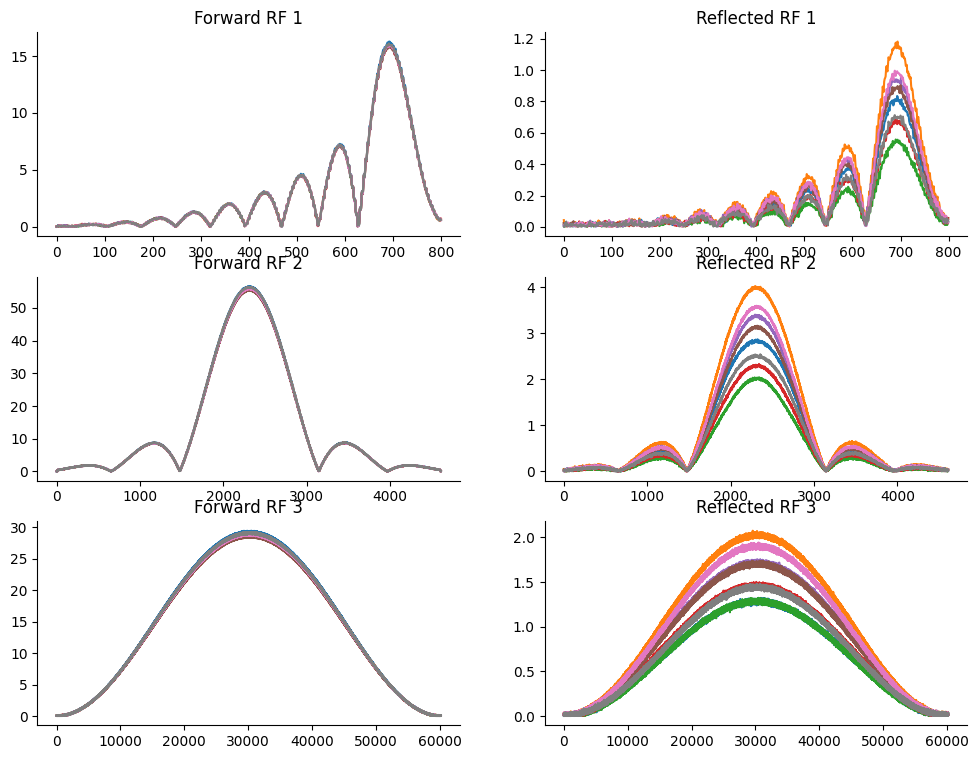

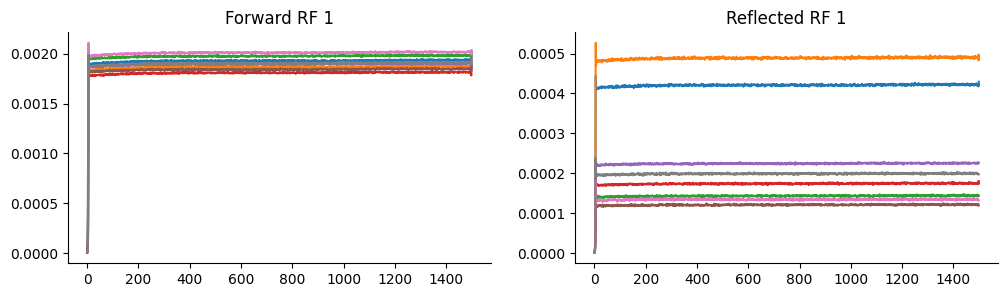

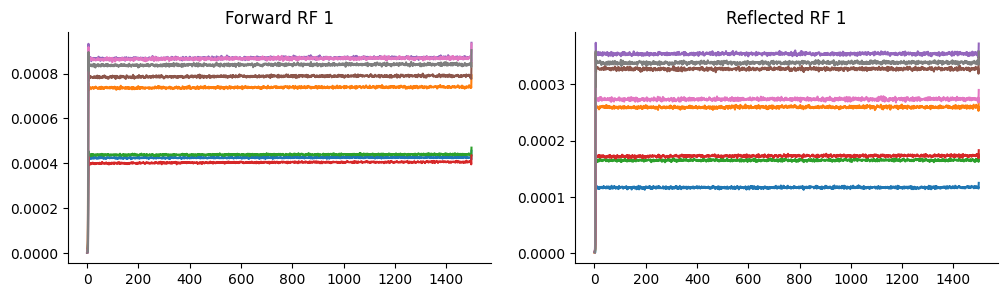

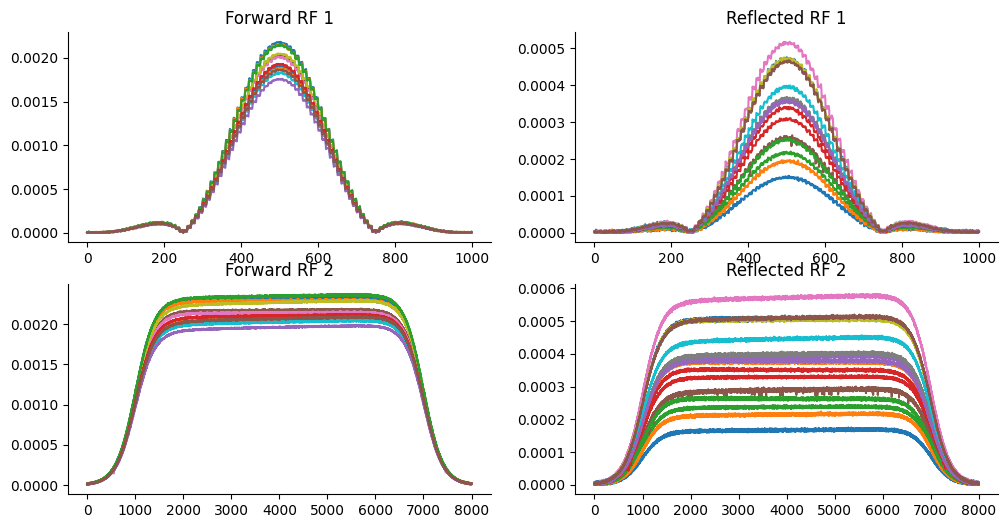

In [1]:
%reset -f

import twixtools
import dicoreader
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

terrax_XA60A  = '/DATA2/rawdata/RFPA_DiCo_examples/TerraX_twix.dat'
terra_VE12U   = '/DATA2/rawdata/RFPA_DiCo_examples/Terra_twix.dat'
m7tplus_VE12U = '/DATA2/rawdata/RFPA_DiCo_examples/7TPlus_twix.dat'
m9tplus_VE12U = '/DATA2/rawdata/RFPA_DiCo_examples/9TPlus_twix.dat'
twixfiles = [terrax_XA60A, terra_VE12U, m7tplus_VE12U, m9tplus_VE12U]
scanners  = ['Terra.X', 'Terra', '7TPlus', '9TPlus']

headers = ["RF No", "Tx No", "RF Length", "RF Count"]

for twixfile, scanner in zip(twixfiles, scanners):
    print(f"Processing file: {twixfile}")
    twixObj  =  twixtools.read_twix(twixfile)
    forward, reflect = dicoreader.read(twixObj)
    data = []
    for i, f in enumerate(forward):
        data.append([i+1, forward[f].shape[0], forward[f].shape[1], forward[f].shape[2]])
    print(tabulate(data, headers=headers))

    # plot waveform of the first RF pulse
    fig, axs = plt.subplots(len(forward), 2, figsize=(12, 3*len(forward)), squeeze=False)
    for i, (f, r) in enumerate(zip(forward, reflect)):
        axs[i, 0].plot(np.abs(forward[f][:, :, 0]).transpose())
        axs[i, 0].set_title(f"Forward RF {i+1}")
        axs[i, 0].spines[['top', 'right']].set_visible(False)

        axs[i, 1].plot(np.abs(reflect[r][:, :, 0]).transpose())
        axs[i, 1].set_title(f"Reflected RF {i+1}")
        axs[i, 1].spines[['top', 'right']].set_visible(False)